## Module Initialization

In [249]:
# import the necessary packages/modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML

### Importing Data

In [250]:
# use the original data
df_ttc_original = pd.read_csv('Subway_SRT_Logs_January 2018.csv', index_col=0, header=0)
# Look at the top 10 pieces of data
df_ttc_original.head(10)

,Time,Day,Station,Code,Min Delay,Min Gap,Bound,Line,Vehicle
Date,,,,,,,,,
2018-01-01,00:29,Monday,SHEPPARD WEST STATION,MUATC,10,15,N,YU,5986
2018-01-01,01:07,Monday,DUNDAS STATION,MUNCA,0,0,NaN,YU,0
2018-01-01,01:22,Monday,MUSEUM STATION,MUSC,0,0,N,YU,5751
2018-01-01,01:28,Monday,BAY LOWER,EUOE,0,0,NaN,BD,5222
2018-01-01,01:39,Monday,MUSEUM STATION,MUO,6,11,S,YU,5781
2018-01-01,02:00,Monday,BLOOR DANFORTH SUBWAY,MUGD,0,0,NaN,BD,0
2018-01-01,02:09,Monday,KIPLING STATION,MUSAN,3,7,E,BD,5261
2018-01-01,02:32,Monday,UNION STATION,MUIS,0,0,NaN,YU,0
2018-01-01,02:42,Monday,COLLEGE STATION,SUDP,7,12,N,YU,5696


### Initializing Data Analysis

In [251]:
# Let's determine which columns have missing data
# so that we come to a decision of deletion or imputation
print('Occurrences of null data for each column:')
the_nulls = pd.isnull(df_ttc_original).sum()
print(the_nulls)

Occurrences of null data for each column:
Time           0
Day            0
Station        0
Code           0
Min Delay      0
Min Gap        0
Bound        393
Line          10
Vehicle        0
dtype: int64


We see that the NULL values occur at the columns 'Bound' and 'Line'. However, in reference to the previous cell, there are multiple cases of 0 being labelled within the Vehicle number, which may be considered as a NULL

In [252]:
df_ttc_renew_vehicles = df_ttc_original.groupby('Vehicle').count()
df_ttc_renew_vehicles['Time'].head(1)

Vehicle
0    456
Name: Time, dtype: int64

In [253]:
# determining the number of rows there are
rows = df_ttc_original.shape[0]
print("In this data set, there are " + str(rows) + " rows")

In this data set, there are 1873 rows


Considering the impact if we were to just obliviously delete all rows will nulls, the data deleted would represent a significant amount of the data reported in our csv file (representing at least 456 rows). What we can also do is use describe to see what can be considered as "measurable"

In [254]:
df_ttc_original.describe()

,Min Delay,Min Gap,Vehicle
count,1873.000000,1873.000000,1873.000000
mean,2.791244,3.980246,4073.530166
std,9.385311,10.218298,2376.690666
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,3004.000000
50%,0.000000,0.000000,5249.000000
75%,3.000000,7.000000,5646.000000
max,248.000000,253.000000,8713.000000


Given the circumstances, where the only two "measurable" columns (based on their data types) aren't the columns with NULL values, we don't have to impute/delete anything just yet, but only for questions in regarding to bounds, lines, and vehicles

## Question 1: During which periods of the day do the delays occur more often?

In [255]:
# Special thanks to the announcements (Yichen) for the code below.
# this cell provides our original dataframe with an extra column
# called 'Hour'. This is used for question 1.

import datetime
def obtainHourOfDay(timestr): 
    datetime_obj = datetime.datetime.strptime(timestr, '%H:%M') 
    return datetime_obj.hour

# we'll make a copy of the original data in case of mutability
df_q1 = df_ttc_original[:]
# then we apply the function to get the specified hour
df_q1.loc[:,'Hour'] = df_q1['Time'].apply(obtainHourOfDay) 
df_q1.head()

C:\Users\Dann Justin\Anaconda3\lib\site-packages\pandas\core\indexing.py:337: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\Dann Justin\Anaconda3\lib\site-packages\pandas\core\indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,Time,Day,Station,Code,Min Delay,Min Gap,Bound,Line,Vehicle,Hour
Date,,,,,,,,,,
2018-01-01,00:29,Monday,SHEPPARD WEST STATION,MUATC,10,15,N,YU,5986,0
2018-01-01,01:07,Monday,DUNDAS STATION,MUNCA,0,0,NaN,YU,0,1
2018-01-01,01:22,Monday,MUSEUM STATION,MUSC,0,0,N,YU,5751,1
2018-01-01,01:28,Monday,BAY LOWER,EUOE,0,0,NaN,BD,5222,1
2018-01-01,01:39,Monday,MUSEUM STATION,MUO,6,11,S,YU,5781,1


### Broader view: Based on Morning, Afternoon and Night

This is the top of the data after adding a new column:


C:\Users\Dann Justin\Anaconda3\lib\site-packages\pandas\core\indexing.py:337: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\Dann Justin\Anaconda3\lib\site-packages\pandas\core\indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,Time,Day,Station,Code,Min Delay,Min Gap,Bound,Line,Vehicle,Hour,Time of Day
Date,,,,,,,,,,,
2018-01-01,00:29,Monday,SHEPPARD WEST STATION,MUATC,10,15,N,YU,5986,0,Morning
2018-01-01,01:07,Monday,DUNDAS STATION,MUNCA,0,0,NaN,YU,0,1,Morning
2018-01-01,01:22,Monday,MUSEUM STATION,MUSC,0,0,N,YU,5751,1,Morning


THis is the bottom of the data after adding a new column:


,Time,Day,Station,Code,Min Delay,Min Gap,Bound,Line,Vehicle,Hour,Time of Day
Date,,,,,,,,,,,
2018-01-31,22:39,Wednesday,UNION STATION,SUO,0,0,N,YU,5696,22,Night
2018-01-31,23:04,Wednesday,COLLEGE STATION,MUSAN,3,6,S,YU,5416,23,Night
2018-01-31,23:35,Wednesday,YONGE UNIVERSITY LINE,MUGD,0,0,NaN,YU,0,23,Night


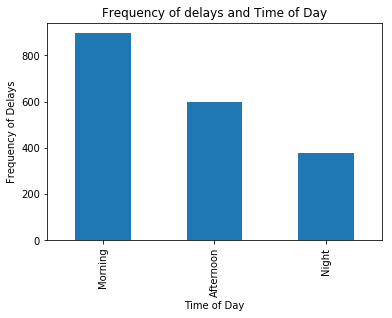

In [256]:
# the diffculty of this question is capturing what
# time intervals would be considered 'Morning'/'Afternoon'/'Night'
# so this will be subjective and will not be the default bin placement
# i.e. pd.cut(df_q1['Hour'] 3, labels = ["Morning", "Afternoon", "Night"])

# If we were to use the function above then
#     24/3 = 8 per interval
#     12:00am to 8:00am is morning
#     8:00am to 4:00pm is afternoon
#     4:00pm to 12:00pm is night
# which may be odd considering the literal meaning of "after noon"


# Rather, we can change this to
#     12:00am to 12:00pm is morning,
#     12:00pm to 7:00pm is afternoon,
#     7:00pm to 12:00am is night

our_range = [0, 12, 19, 25]
our_buckets = ["Morning", "Afternoon", "Night"]
# use "cut" to get to label our buckets
new_col = pd.cut(df_q1['Hour'], our_range, right=False, labels=our_buckets)
# insert the new column to our DataFrame
df_q1.loc[:, "Time of Day"] = new_col
print('This is the top of the data after adding a new column:')
display(df_q1.head(3))
print('THis is the bottom of the data after adding a new column:')
display(df_q1.tail(3))

# We would now like to group by the time of day, but we want to know how often
# the delay occurs, asked in the question
# so we use the count function after the the group by function
df_broad = df_q1.groupby('Time of Day').count()

# we can aribtrarily get any column because we just need frequency of delays
# for our plot graph
df_broad['Time'].plot.bar()
# label properly
plt.ylabel("Frequency of Delays")
plt.xlabel("Time of Day")
plt.title("Frequency of delays and Time of Day")
plt.show()

### Closer View: Per Hour

C:\Users\Dann Justin\Anaconda3\lib\site-packages\pandas\core\indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


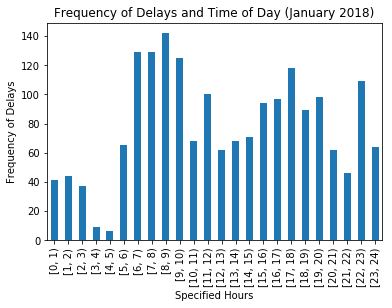

In [257]:
# We can now group the data, based on the 24 hour clock as mentioned in the metadata
hour_range = range(0, 25)  # we go up to 25 so that there exists a bucket for 23 to 0
# then we cut the data
the_buckets = pd.cut(df_q1['Hour'], hour_range, right=False)

# we can now place our data into "buckets" by overwriting the "Time of Day" column
df_q1.loc[:, "Time of Day"] = the_buckets
# we can group all of them by the time of day, specifically by frequency
# as asked by the question
df_closer = df_q1.groupby("Time of Day").count()

# we can now pick an arbitrary column and make our plot
df_closer["Time"].plot.bar()
plt.ylabel("Frequency of Delays")
plt.xlabel("Specified Hours")
plt.title("Frequency of Delays and Time of Day (January 2018)")
plt.show()

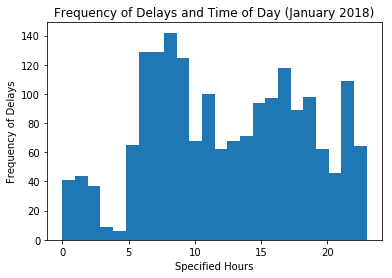

In [258]:
# Alternatively, we can use a histogram to see all of this.
df_q1["Hour"].plot.hist(bins=24)
plt.ylabel("Frequency of Delays")
plt.xlabel("Specified Hours")
plt.title("Frequency of Delays and Time of Day (January 2018)")
plt.show()

# Question 2: Is there a correlation between the time of day and the total delay time?

In [259]:
def scatter_plot_me(df_general, y_axis, x_label, y_label):
    '''
    (DataFrame, str, str) -> None

    Displays a scatter plot of the data shown with the line
    of best fit. The x axis is presumed to be the index,
    the y axis is the column name of the specified dataframe.
    '''
    
    # get the index's values, and have them as x
    x = df_general.index.values
    y = df_general[y_axis]
    
    plt.scatter(x, y, color = "blue")
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    title = x_label + " and " + y_label
    plt.title(title)
    plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)), color = "orange")
    plt.show()

### Overall

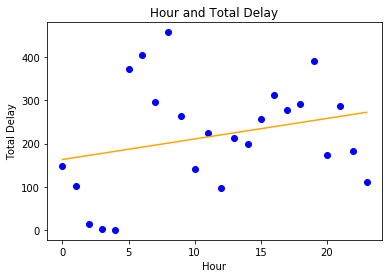

Pearson Correlation coefficient:


,Hour of Day,Min Delay
Hour of Day,1.000000,0.265789
Min Delay,0.265789,1.000000


In [260]:
# We will be using question 1's dataframe since all other
# questions will not be considering time of day

# First we want to set the index to "Hour" so that we have
# an initial x axis
df_q2 = df_q1.groupby("Hour")
# AND we want a y axis for the total delay time, so we 
# use the sum function
df_q2 = df_q2.sum()



# What we would like to do is to draw a scatter plot
# to see if there are any outliers between Hour and
# total delay time
scatter_plot_me(df_q2, "Min Delay", "Hour", "Total Delay")
# it's rather difficult to see if there are outliers
# since it looks like it goes up twice (between 0 and 10,
# and 11 to 17). Also, removing data may not be plausible
# as we only have a specific amount of 24 points 

# In document insert intuitions of the elasticity of
# the line of best fit

# Now we use pearson's correlation coefficient on q1's dataframe
print("Pearson Correlation coefficient:")
#df_q1[["Hour", "Min Delay"]].corr('pearson')
# thus, this shows little to no correlation using a linear
# regression method... but it looks more like a sin function

# to identify the correlation between time of day and
# sum of delays, we have to use the pearson correlation

# However, I can't find a way to use the the index
# as a comparison column, so I will add the 
# indexed columns as a new column
df_q2.loc[:, "Hour of Day"] = df_q2.index.values

# Now we would like to find the correlation between
# hour of day and the sum of delays
df_q2[["Hour of Day", "Min Delay"]].corr("pearson")

To our suspicion what we can do is divide the time into three parts: Morning Afternoon and Night.
For our criteria:
12:00am to 12:00pm is morning
12:00pm to 7:00pm is afternoon
7:00pm to 12:00am is night

### In mornings

There are 895 rows used


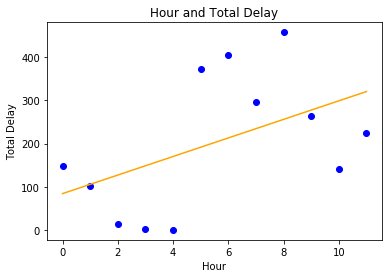

The correlation coefficient in mornings:


,Hour of Day,Min Delay
Hour of Day,1.000000,0.484116
Min Delay,0.484116,1.000000


In [261]:
# Based on our criteria, we want the hours of
# morning to be from 12:00am to 12:00pm
df_morning = df_q1[df_q1["Hour"] < 12]
print("There are " + str(df_morning.shape[0]) + " rows used")
# Now we would like to group this by the hour
df_morning = df_morning.groupby("Hour")
# and, as specified, the total amount of delay
df_morning = df_morning.sum()

# Now we would like to make a scatter plot out of the morning data
scatter_plot_me(df_morning, "Min Delay", "Hour", "Total Delay")

# and output the correlation coefficient
print("The correlation coefficient in mornings:")
# can't use the index to find the correlation between sums, so we
# add the indexed column as a new column
df_morning.loc[:, "Hour of Day"] = df_morning.index.values

# now we can use pearson's correlation
df_morning[["Hour of Day", "Min Delay"]].corr("pearson")

### In Afternoons

There are 537 rows used


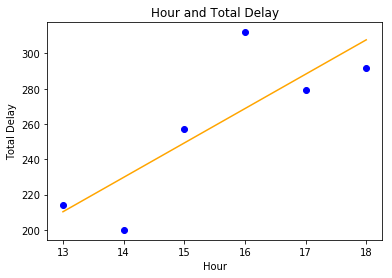

The correlation coefficient in afternoons:


,Hour of Day,Min Delay
Hour of Day,1.000000,0.823086
Min Delay,0.823086,1.000000


In [262]:
# Based on our criteria, we want the hours of
# afternoon to be from 12:00pm to 7:00pm
df_afternoon = df_q1[df_q1["Hour"] > 12]
df_afternoon = df_afternoon[df_afternoon["Hour"] < 19]
print("There are " + str(df_afternoon.shape[0]) + " rows used")
# Now we would like to group this by the hour
df_afternoon = df_afternoon.groupby("Hour")
# and, as specified, the total amount of delay
df_afternoon = df_afternoon.sum()

# Now we would like to make a scatter plot out of the morning data
scatter_plot_me(df_afternoon, "Min Delay", "Hour", "Total Delay")

# and output the correlation coefficient
print("The correlation coefficient in afternoons:")
# can't use the index to find the correlation between sums, so we
# add the indexed column as a new column
df_afternoon.loc[:, "Hour of Day"] = df_afternoon.index.values

# now we can use pearson's correlation
df_afternoon[["Hour of Day", "Min Delay"]].corr("pearson")

### At Night

There are 281 rows used


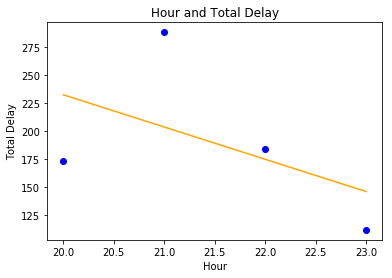

The correlation coefficient at night:


,Hour of Day,Min Delay
Hour of Day,1.000000,-0.507179
Min Delay,-0.507179,1.000000


In [263]:
# Based on our criteria, we want the hours of
# afternoon to be from 7:00pm to 12:00am
df_night = df_q1[df_q1["Hour"] > 19]
print("There are " + str(df_night.shape[0]) + " rows used")
# Now we would like to group this by the hour
df_night = df_night.groupby("Hour")
# and, as specified, the total amount of delay
df_night = df_night.sum()

# Now we would like to make a scatter plot out of the morning data
scatter_plot_me(df_night, "Min Delay", "Hour", "Total Delay")

# and output the correlation coefficient
print("The correlation coefficient at night:")
# can't use the index to find the correlation between sums, so we
# add the indexed column as a new column
df_night.loc[:, "Hour of Day"] = df_night.index.values

# now we can use pearson's correlation
df_night[["Hour of Day", "Min Delay"]].corr("pearson")

# Question 3: What are the 10 stations that suffer the most delays? Consider both the total number of delay occurrences and the length of delays as criteria.

In [264]:
# Make two dataframes

# One is going to be based on the number of delays
# One is going to be based on the total amount of time


# first we want to group the data by the station specified
gb_q3 = df_ttc_original[:].groupby("Station")
# we want to use the sum function to display the total length of delays
df_q3 = gb_q3.sum()
# and we want to use the count function for another data frame to get
# the number of occurrences for delays
df_q3_freq = gb_q3.count()
# we only need one column from the frequency dataframe to get the number
# of occurrences, using df_q3 as our base dataframe
df_q3.loc[:, "Delay Frequency"] = df_q3_freq["Time"]

# Now we have all the data needed for this question, however we can add
# an average number of delays as an extra criterion
df_q3.loc[:, "Average time per delay"] = df_q3["Min Delay"] / df_q3["Delay Frequency"]

### By the total number of delay occurrences

,Delay Frequency
Station,
KENNEDY BD STATION,89
KIPLING STATION,88
YONGE UNIVERSITY LINE,73
FINCH STATION,65
WILSON STATION,58
VICTORIA PARK STATION,53
WARDEN STATION,51
SHEPPARD WEST STATION,44
ISLINGTON STATION,43


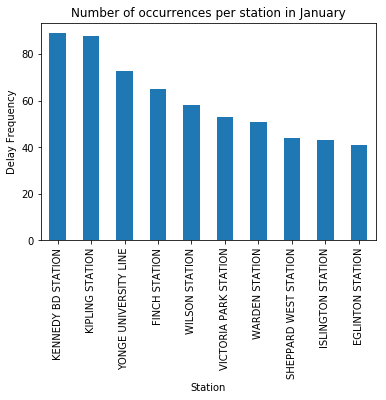

In [265]:
# we want to order this by the delay frequency
# and we want to order it from least to greatest
df_q3_freq = df_q3.sort_values(by="Delay Frequency", ascending=False)
# we specifically want the top 10 stations with the
# greatest amount of delay frequencies
df_q3_freq = df_q3_freq.head(10)
# show the top 10 stations
display(pd.DataFrame(df_q3_freq["Delay Frequency"]))

# Now we would like to use a bar graph to demonstrate
# the number of delays in a visual scale
df_q3_freq["Delay Frequency"].plot.bar()
plt.ylabel("Delay Frequency")
plt.xlabel("Station")
plt.title("Number of occurrences per station in January")
plt.show()

### By the total number of delayed time

,Min Delay
Station,
VAUGHAN MC STATION,280
UNION STATION,273
WILSON STATION,220
WARDEN STATION,212
SHEPPARD WEST STATION,193
KENNEDY SRT STATION,182
VICTORIA PARK STATION,163
LAWRENCE EAST TO ELLES,148
BLOOR DANFORTH SUBWAY,131


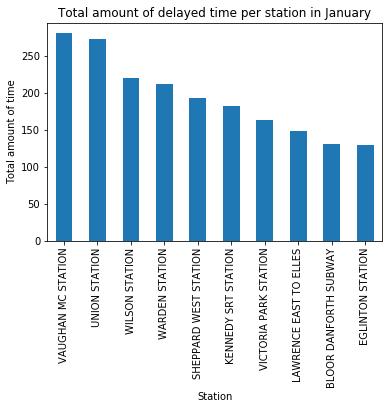

In [266]:
# we want to order this by the delay time
# and we want to order it from least to greatest
df_q3_time = df_q3.sort_values(by="Min Delay", ascending=False)
# we specifically want the top 10 stations with the
# greatest amount of delay time
df_q3_time = df_q3_time.head(10)
# show the top 10 stations
display(pd.DataFrame(df_q3_time["Min Delay"]))

# Now we would like to use a bar graph to demonstrate
# the number of delays in a visual scale
df_q3_time["Min Delay"].plot.bar()
plt.ylabel("Total amount of time")
plt.xlabel("Station")
plt.title("Total amount of delayed time per station in January")
plt.show()

### By Average time delayed

,Average time per delay
Station,
LAWRENCE EAST TO ELLES,148.000000
UNION STATION,13.000000
KENNEDY SRT STATION,11.375000
VAUGHAN MC STATION,8.750000
ST ANDREW STATION,5.812500
MIDLAND STATION,5.750000
MCCOWAN STATION,5.700000
SCARB CTR STATION,5.333333
DOWNSVIEW PARK STATION,5.285714


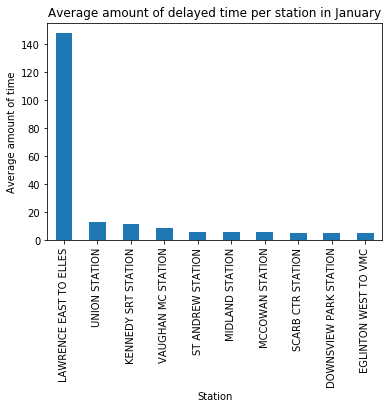

Lawrence East to Ellesmere looks like an outlier
We shall see all entries of Lawrence east to Ellesemere with our original data:


,Time,Day,Station,Code,Min Delay,Min Gap,Bound,Line,Vehicle
Date,,,,,,,,,
2018-01-16,21:21,Tuesday,LAWRENCE EAST TO ELLES,PRW,148,153,N,SRT,3013


In [267]:
# we want to order this by the average delay time
# and we want to order it from least to greatest
df_q3_avg = df_q3.sort_values(by="Average time per delay", ascending=False)
# we specifically want the top 10 stations with the
# greatest amount of the average delay time
df_q3_avg_1 = df_q3_avg.head(10)
# show the top 10 stations
display(pd.DataFrame(df_q3_avg_1["Average time per delay"]))

# Now we would like to use a bar graph to demonstrate
# the number of delays in a visual scale
df_q3_avg_1["Average time per delay"].plot.bar()
plt.ylabel("Average amount of time")
plt.xlabel("Station")
plt.title("Average amount of delayed time per station in January")
plt.show()

print("Lawrence East to Ellesmere looks like an outlier")
print("We shall see all entries of Lawrence east to Ellesemere with our original data:")
df_ttc_original[df_ttc_original["Station"] == "LAWRENCE EAST TO ELLES"]

We can reuse our data, and remove lawrence east to ellesmere as an outlier since it is only one entry that does not occur in a consistent basis

,Min Delay,Delay Frequency,Average time per delay
Station,,,
UNION STATION,273,21,13.000000
KENNEDY SRT STATION,182,16,11.375000
VAUGHAN MC STATION,280,32,8.750000
ST ANDREW STATION,93,16,5.812500
MIDLAND STATION,23,4,5.750000
MCCOWAN STATION,114,20,5.700000
SCARB CTR STATION,64,12,5.333333
DOWNSVIEW PARK STATION,37,7,5.285714
EGLINTON WEST TO VMC,5,1,5.000000


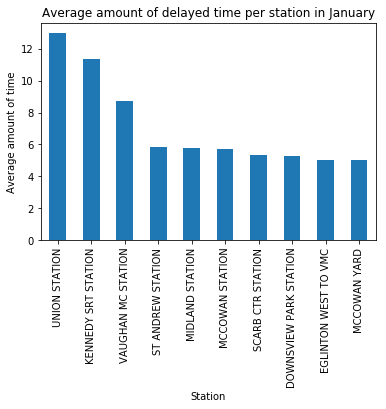

In [268]:
df_q3_avg_2 = df_q3_avg.head(11)
# we can remove lawrence east using iloc
df_q3_avg_2 = df_q3_avg_2.iloc[1:]

# view the data
display(pd.DataFrame(df_q3_avg_2[["Min Delay", "Delay Frequency", "Average time per delay"]]))

# and now we can replot the data
df_q3_avg_2["Average time per delay"].plot.bar()
plt.ylabel("Average amount of time")
plt.xlabel("Station")
plt.title("Average amount of delayed time per station in January")
plt.show()

# Question 4: What are the top 10 reasons for delays?

The top 10 reasons for delays are shown below with their total minute delay:


,Min Delay
Code,
MUI,392
SUDP,389
PUTR,262
MUIR,231
MUPLB,216
MUATC,211
EUDO,179
PRW,148
SUAP,142


Here is a graphical perspective of the data above:


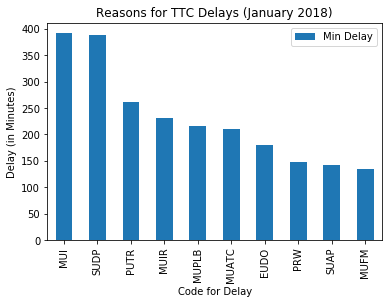

In [269]:
# First we will copy the original dataframe
df_q4 = df_ttc_original[:]
# What we would like to do is group the data by the delay code (as they are reasons)
# but more specifically by sums to determine the total amount of the delay
df_code_delays = df_q4.groupby("Code").sum()
# now we want to sort our data from greatest to least
df_code_delays = df_code_delays.sort_values("Min Delay", ascending=False)

# we specifically only want the top 10 minute delays
# indicated by our question
df_code_delays = pd.DataFrame(df_code_delays["Min Delay"].head(10))
# For this python file, we'll just shown our data
print("The top 10 reasons for delays are shown below with their total minute delay:")
display(df_code_delays)


print("Here is a graphical perspective of the data above:")
# Now we can plot our data as a bar graph
df_code_delays.plot.bar()
plt.ylabel("Delay (in Minutes)")
plt.xlabel("Code for Delay")
plt.title("Reasons for TTC Delays (January 2018)")
plt.show()

# Question 5: How many times per day did a delay occur in January? What is the average delay time per day?

In [270]:
# Find the average amount of times per day it can happen on a weekday, and a weekend
# likewise, we want to find the average amount of time per day

# first we want to include a new column called "Weight" so that we would accurately
# know the number of delays per day in January
# copy the data
df_q5 = df_ttc_original[:]

# What we want to do is get the average amount of delay time 
df_q5_init = df_q5.groupby("Date")
# to do this, we will be using the mean function, and this will be our
# base
df_q5 = df_q5_init.mean()
# what we want is the frequency of each day, so we will be using the count
# function and adding an arbitrary column (that does not have nulls) to our 
# base dataframe
df_q5_counts = df_q5_init.count()
df_q5.loc[:, "Frequency of delays"] = df_q5_counts["Time"]

print("The following data consists of the average delay time and the frequency of delays per day in January:")
display(df_q5)


print("From this data, we can use the describe method, but specifically on the number of delays shown below:")
display(df_q5["Frequency of delays"].describe())

print("On an 'ordinary' day, there will be approximately 60 delays")

The following data consists of the average delay time and the frequency of delays per day in January:


,Min Delay,Min Gap,Vehicle,Frequency of delays
Date,,,,
2018-01-01,4.103448,6.224138,3666.362069,58
2018-01-02,2.373333,3.346667,3550.040000,75
2018-01-03,2.358209,4.014925,4135.776119,67
2018-01-04,3.333333,4.301587,3315.285714,63
2018-01-05,2.474359,3.794872,4024.410256,78
2018-01-06,2.489362,4.659574,3981.936170,47
2018-01-07,2.060606,3.303030,4076.818182,33
2018-01-08,4.045455,4.852273,4315.659091,88
2018-01-09,2.333333,2.575758,4165.969697,66


From this data, we can use the describe method, but specifically on the number of delays shown below:


count    31.000000
mean     60.419355
std      17.691381
min      22.000000
25%      49.500000
50%      62.000000
75%      74.500000
max      88.000000
Name: Frequency of delays, dtype: float64

On an 'ordinary' day, there will be approximately 60 delays


From the original data, we will use the describe method to find the average number of minutes per delay. The dataframe used above is not used because it assumes that the weight is equal among 31 days 

In [271]:
df_ttc_original.describe()

,Min Delay,Min Gap,Vehicle
count,1873.000000,1873.000000,1873.000000
mean,2.791244,3.980246,4073.530166
std,9.385311,10.218298,2376.690666
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,3004.000000
50%,0.000000,0.000000,5249.000000
75%,3.000000,7.000000,5646.000000
max,248.000000,253.000000,8713.000000


And we see that the average delay takes about 2.8 minutes. An arising question with the original dataframe shown is to determine if there is a correlation between the frequency of delays and the average time per delay. (i.e. does the average time of delays go to extremes when there is a low frequency?)

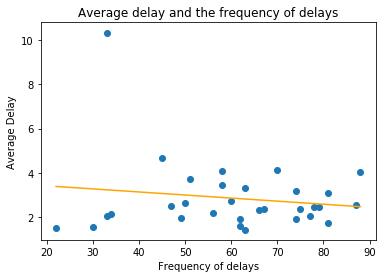

In [272]:
# this may be a case where if there are more delays, it's more distributed around toronto, 
# making it expectedly convenient for people of toronto to know?
x = df_q5["Frequency of delays"]
y = df_q5["Min Delay"]

# we can create a scatter plot
plt.scatter(df_q5["Frequency of delays"], df_q5["Min Delay"])
plt.title("Average delay and the frequency of delays")
plt.xlabel("Frequency of delays")
plt.ylabel("Average Delay")
plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)), color = "orange")
plt.show()

We see that there is an outlier, so we will remove it

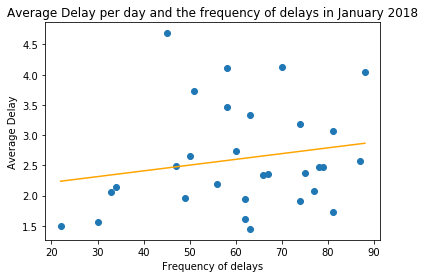

In [273]:
# by setting minute delays less than 10
df_q5 = df_q5[df_q5["Min Delay"] < 10]

x = df_q5["Frequency of delays"]
y = df_q5["Min Delay"]
# now we can replot the data
plt.scatter(df_q5["Frequency of delays"], df_q5["Min Delay"])
plt.xlabel("Frequency of delays")
plt.ylabel("Average Delay")
plt.title("Average Delay per day and the frequency of delays in January 2018")
plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)), color = "orange")
plt.show()

Now we want to find the correlation coefficient

In [274]:
# We can just easily do so by using the matrix from the following
df_q5.corr('pearson')

,Min Delay,Min Gap,Vehicle,Frequency of delays
Min Delay,1.000000,0.928551,0.071239,0.188295
Min Gap,0.928551,1.000000,0.053520,0.010898
Vehicle,0.071239,0.053520,1.000000,0.080066
Frequency of delays,0.188295,0.010898,0.080066,1.000000


It's a fairly weak correlation, and more historical data may be needed. However, future considerations of hypothesizing that "the further there are delays, there is less delay time per delay" may be plausible

# Question 6: Is there a correlation between day of the week and the total number of delays?

Our data looks like:


,Frequency of delays,Days (number representation),Frequency of days in January,Average frequency of delays
Day,,,,
Monday,315,1,5,63.00
Tuesday,371,2,5,74.20
Wednesday,345,3,5,69.00
Thursday,259,4,4,64.75
Friday,288,5,4,72.00
Saturday,176,6,4,44.00
Sunday,119,7,4,29.75


We can visually see the data above:


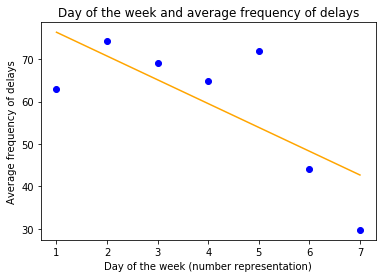

In [275]:
# What we can do is group our data by the day of the week
# and the question only specified number of delays (frequency)
# not total length of the delay. So we will be using the 
# count method
df_q6 = df_ttc_original[:].groupby("Day").count()
# what pandas cleverly does is sort alphabetically... which
# can be a problem for this question, however, it can be
# sufficient for us to insert a new (hardcoded) column,
# later displaying a scatter plot

# in this case:
#     Monday is 1
#     Tuesday is 2
#     Wednesday is 3
#     Thursday is 4
#     Friday is 5
#     Saturday is 6
#     Sunday is 7
days = [5, 1, 6, 7, 4, 2, 3]
df_q6.loc[:, "Days (number representation)"] = days
# What we have to also consider is that if we were to 
# proceed with our dataframe, our data would be skewed 
# (i.e. Monday Tuesday and Wednesday) have one more extra day
# in January, so it makes much more sense to add two more columns
# one representing the number of "Days" there are in the week in
# January
# and the other representing averages

# ...sort this by our new column
df_q6 = df_q6.sort_values(by="Days (number representation)")
# then insert the frequency of the days in January
num_days = [5, 5, 5, 4, 4, 4, 4]
df_q6.loc[:, "Frequency of days"] = num_days


# since time doesn't have any null values, we will be using it as our frequency of delays
# only get our relevant data
df_q6 = df_q6[["Time", "Days (number representation)", "Frequency of days"]]
# and I want to rename the columns
cols = ["Frequency of delays", "Days (number representation)", "Frequency of days in January"]
df_q6.columns = cols

# now we can add an average column
df_q6.loc[:, "Average frequency of delays"] = df_q6["Frequency of delays"] / df_q6["Frequency of days in January"]
print("Our data looks like:")
display(df_q6)

x = df_q6["Days (number representation)"]
y = df_q6["Average frequency of delays"]
# now we can approach this problem by drawing a scatter plot
print("We can visually see the data above:")
plt.scatter(df_q6["Days (number representation)"], df_q6["Average frequency of delays"], color="blue")
plt.xlabel("Day of the week (number representation)")
plt.ylabel("Average frequency of delays")
plt.title("Day of the week and average frequency of delays")
plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)), color = "orange")
plt.show()

Now we can compute the correlation coefficient

In [276]:
df_q6.corr("pearson")

,Frequency of delays,Days (number representation),Frequency of days in January,Average frequency of delays
Frequency of delays,1.000000,-0.875683,0.780590,0.940085
Days (number representation),-0.875683,1.000000,-0.866025,-0.736117
Frequency of days in January,0.780590,-0.866025,1.000000,0.522762
Average frequency of delays,0.940085,-0.736117,0.522762,1.000000


# Question 7: Is there a correlation between day of the week and average delay time? How about time of the day and minimum gaps?

## Day of the week and average delay time

Data needed for day of the week and delay time:


,Min Delay,Min Gap,Vehicle,Days (number representation)
Day,,,,
Friday,2.597222,3.829861,4105.534722,5
Monday,2.987302,4.139683,4044.476190,1
Saturday,4.880682,6.869318,4178.079545,6
Sunday,1.857143,3.134454,4028.193277,7
Thursday,2.374517,3.374517,3907.888031,4
Tuesday,2.870620,3.897574,4066.420485,2
Wednesday,2.257971,3.321739,4167.640580,3


Visual representation of data:


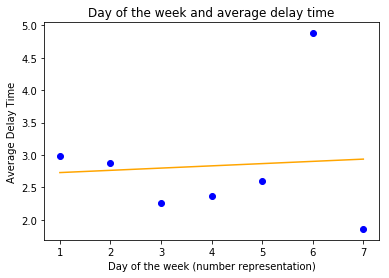

Correlation coefficient matrix:


,Min Delay,Min Gap,Vehicle,Days (number representation)
Min Delay,1.000000,0.989335,0.493108,0.076247
Min Gap,0.989335,1.000000,0.523510,0.206931
Vehicle,0.493108,0.523510,1.000000,0.093881
Days (number representation),0.076247,0.206931,0.093881,1.000000


In [277]:

# what we can do is copy the original data and we want to group them by day
df_q7 = df_ttc_original[:].groupby("Day")
# and we want the average delay time
df_q7 = df_q7.mean()
df_q7

# pandas alphabetically orders the data
# so what we'll do is similar to question 6, which is to provide 
# number representations of the data
# in this case:
#     Monday is 1
#     Tuesday is 2
#     Wednesday is 3
#     Thursday is 4
#     Friday is 5
#     Saturday is 6
#     Sunday is 7
days = [5, 1, 6, 7, 4, 2, 3]
df_q7.loc[:, "Days (number representation)"] = days

print("Data needed for day of the week and delay time:")
display(df_q7)
x = df_q7["Days (number representation)"]
y = df_q7["Min Delay"]

print("Visual representation of data:")
# now we can conduct a scatter plot of the data requested to see any outliers
plt.scatter(df_q7["Days (number representation)"], df_q7["Min Delay"], color="blue")
plt.xlabel("Day of the week (number representation)")
plt.ylabel("Average Delay Time")
plt.title("Day of the week and average delay time")
plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)), color = "orange")
plt.show()

# and we want to show if there is a correlation, by using the correlation coefficient matrix
print("Correlation coefficient matrix:")
df_q7.corr('pearson')

The scatter plot raises some suspicion. In this case, we may reimplement the data like we did above, but to first investigate why saturday is really high while the line of best fit is fairly elastic

In [278]:
# What we would like to do is specifically get the saturday data
df_sat = df_ttc_original[:]
df_sat = df_sat[df_sat['Day']=="Saturday"]
# we want to sort this by the minutes of the delay, from greatest
# to least
df_sat = df_sat.sort_values(by="Min Delay", ascending=False)
display(df_sat.head(5))
print("There are " + str(df_sat.shape[0]))

,Time,Day,Station,Code,Min Delay,Min Gap,Bound,Line,Vehicle
Date,,,,,,,,,
2018-01-13,19:19,Saturday,UNION STATION,PUTR,248,253,N,YU,5461
2018-01-27,11:34,Saturday,SHEPPARD WEST STATION,SUBT,59,64,N,YU,5756
2018-01-27,11:49,Saturday,FINCH WEST STATION,SUBT,44,49,S,YU,6106
2018-01-20,13:49,Saturday,YORK MILLS STATION,MUPLB,39,42,N,YU,5412
2018-01-27,18:52,Saturday,WOODBINE STATION,SUUT,22,26,W,BD,5127


There are 176


We see that the highest minute delay is nearly 5 times from the second highest minute delay, so we will remove this piece of data and redo this process.

In [279]:
# to remove that row specifically, we need to define that row with a list
to_remove = ['2018-01-13', '19:19', 'Saturday', 'UNION STATION', 'PUTR', 248]
# copy the data
df_q7 = df_ttc_original[:]
# and to make sure we remove the data, let's see the very top delays in minutes
df_q7 = df_q7.sort_values(by="Min Delay", ascending=False)
display(df_q7.head())

# now let's drop the row that we indicated and display our dataframe again
df_q7 = df_q7.drop(to_remove)
df_q7.head()

,Time,Day,Station,Code,Min Delay,Min Gap,Bound,Line,Vehicle
Date,,,,,,,,,
2018-01-13,19:19,Saturday,UNION STATION,PUTR,248,253,N,YU,5461
2018-01-16,21:21,Tuesday,LAWRENCE EAST TO ELLES,PRW,148,153,N,SRT,3013
2018-01-08,05:45,Monday,BLOOR DANFORTH SUBWAY,MUFM,131,134,E,BD,5212
2018-01-10,18:12,Wednesday,VAUGHAN MC STATION,MUATC,94,96,N,YU,5986
2018-01-08,15:28,Monday,WARDEN STATION,PUSSW,82,87,E,BD,5006


,Time,Day,Station,Code,Min Delay,Min Gap,Bound,Line,Vehicle
Date,,,,,,,,,
2018-01-16,21:21,Tuesday,LAWRENCE EAST TO ELLES,PRW,148,153,N,SRT,3013
2018-01-08,05:45,Monday,BLOOR DANFORTH SUBWAY,MUFM,131,134,E,BD,5212
2018-01-10,18:12,Wednesday,VAUGHAN MC STATION,MUATC,94,96,N,YU,5986
2018-01-08,15:28,Monday,WARDEN STATION,PUSSW,82,87,E,BD,5006
2018-01-04,06:19,Thursday,KENNEDY SRT STATION,ERTC,76,82,N,SRT,3001


We see that the outlier is now removed, so we can reapply our steps!

Data needed for day of the week and delay time:


,Min Delay,Min Gap,Vehicle,Days (number representation)
Day,,,,
Friday,2.597222,3.829861,4105.534722,5
Monday,2.987302,4.139683,4044.476190,1
Saturday,3.622378,5.538462,4175.741259,6
Sunday,1.857143,3.134454,4028.193277,7
Thursday,2.374517,3.374517,3907.888031,4
Tuesday,2.870620,3.897574,4066.420485,2
Wednesday,2.257971,3.321739,4167.640580,3


Visual representation of data:


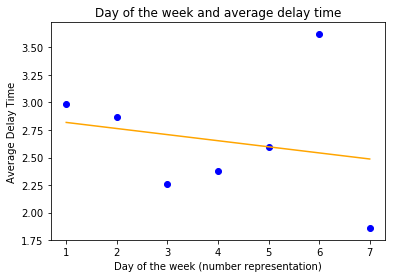

Correlation coefficient matrix:


,Min Delay,Min Gap,Vehicle,Days (number representation)
Min Delay,1.000000,0.953175,0.414956,-0.208448
Min Gap,0.953175,1.000000,0.504381,0.073684
Vehicle,0.414956,0.504381,1.000000,0.090413
Days (number representation),-0.208448,0.073684,0.090413,1.000000


In [280]:
# what we can do is copy the original data and we want to group them by day
df_q7 = df_q7.groupby("Day")
# and we want the average delay time
df_q7 = df_q7.mean()
df_q7

# pandas alphabetically orders the data
# so what we'll do is similar to question 6, which is to provide 
# number representations of the data
# in this case:
#     Monday is 1
#     Tuesday is 2
#     Wednesday is 3
#     Thursday is 4
#     Friday is 5
#     Saturday is 6
#     Sunday is 7
days = [5, 1, 6, 7, 4, 2, 3]
df_q7.loc[:, "Days (number representation)"] = days

print("Data needed for day of the week and delay time:")
display(df_q7)
x = df_q7["Days (number representation)"]
y = df_q7["Min Delay"]

print("Visual representation of data:")
# now we can conduct a scatter plot of the data requested to see any outliers
plt.scatter(df_q7["Days (number representation)"], df_q7["Min Delay"], color="blue")
plt.xlabel("Day of the week (number representation)")
plt.ylabel("Average Delay Time")
plt.title("Day of the week and average delay time")
plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)), color = "orange")
plt.show()

# and we want to show if there is a correlation, by using the correlation coefficient matrix
print("Correlation coefficient matrix:")
df_q7.corr('pearson')

Correlation between days and minute delay seems much more stronger, having a moderate change of (8-[-21]) = 29. By this fact, we see that the outlier did weigh a lot, even in a large data set of 176 rows (on Saturday)

## Time of Day and Gaps between trains

Our data in this question


,Min Delay,Min Gap,Vehicle,Hour of the day
Hour,,,,
0,3.634146,5.951220,4795.609756,0
1,2.295455,4.000000,4614.363636,1
2,0.351351,0.513514,1845.756757,2
3,0.333333,0.777778,3980.444444,3
4,0.000000,0.000000,949.333333,4


Scatter plot representation:


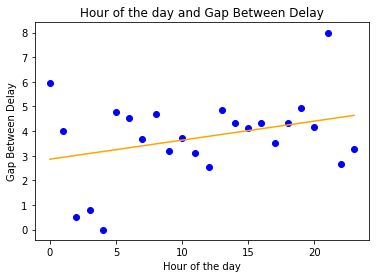

Correlation coefficient matrix:


,Min Delay,Min Gap,Vehicle,Hour of the day
Min Delay,1.000000,0.919572,0.543298,0.271751
Min Gap,0.919572,1.000000,0.672003,0.321552
Vehicle,0.543298,0.672003,1.000000,0.040045
Hour of the day,0.271751,0.321552,0.040045,1.000000


In [281]:
# luckily we have q1's dataframe, so it is copied
df_q7 = df_q1[:]
# what we want to do is group the data by the hour
# and we want to get the average because minimum of gaps
# return 0 and is not meaningful

df_q7 = df_q7.groupby("Hour").mean()
# because we are going to evenutally be doing a correlation
# coefficient, we might as well add the indexed values as
# a new column
df_q7.loc[:, "Hour of the day"] = df_q7.index.values
print("Our data in this question")
display(df_q7.head())

# Thanks to question 2, we can use its function to make
# a scatter plot
print("Scatter plot representation:")
scatter_plot_me(df_q7, "Min Gap", "Hour of the day", "Gap Between Delay")
# we'll keep our data as is

# now we want the correlation coefficient
print("Correlation coefficient matrix:")
df_q7.corr("pearson")

# Question 8: How has the number of delays progressed per week during January? That is, did the number of delays increase, decrease or remain stable during this month as weeks progressed?

In [282]:
def get_dates(df_general):
    '''(DataFrame) -> list of ints

    Returns a list of dates of only a specific month
    '''
    # make a returned list
    new_dates = []
    # and get all of the dates, indicated by our index
    old_dates = df_general.index.values
    for date in old_dates:
        # We want to splice the data of the original date
        # and since it's a string, we have to typecast it
        num_date = int(date[-2:])
        # then we can add it to our returning list
        new_dates.append(num_date)
    # and then return the dates
    return new_dates

In [283]:
# what we want to do is add a new column, specifying date in January
df_q8 = df_ttc_original[:]
# we use the function that's from the above
df_q8.loc[:, "Date (number representation)"] = get_dates(df_q8)

# Now what we want to do is specify the week
# We did these steps because weighing progress is tricky: there are
# three extra days in January, making the data not uniform.

# so:
#     week 1: Jan 1-7
#     week 2: Jan 8-14
#     week 3: Jan 15-21
#     week 4: Jan 22-28
#     week 5: Jan 29-31

# we define our range
our_range = [0, 8, 15, 22, 29, 32]
# make our buckets for the week
our_buckets = [1, 2, 3, 4, 5]
# use "cut" to get to label our buckets
new_col = pd.cut(df_q8['Date (number representation)'], our_range, right=False, labels=our_buckets)
# insert the new column to our DataFrame
df_q8.loc[:, "Week"] = new_col
print("Data that we will be using:")
df_q8.head()

Data that we will be using:


C:\Users\Dann Justin\Anaconda3\lib\site-packages\pandas\core\indexing.py:337: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\Dann Justin\Anaconda3\lib\site-packages\pandas\core\indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,Time,Day,Station,Code,Min Delay,Min Gap,Bound,Line,Vehicle,Date (number representation),Week
Date,,,,,,,,,,,
2018-01-01,00:29,Monday,SHEPPARD WEST STATION,MUATC,10,15,N,YU,5986,1,1
2018-01-01,01:07,Monday,DUNDAS STATION,MUNCA,0,0,NaN,YU,0,1,1
2018-01-01,01:22,Monday,MUSEUM STATION,MUSC,0,0,N,YU,5751,1,1
2018-01-01,01:28,Monday,BAY LOWER,EUOE,0,0,NaN,BD,5222,1,1
2018-01-01,01:39,Monday,MUSEUM STATION,MUO,6,11,S,YU,5781,1,1


It makes much more sense to divide these into days rather than making an overall analysis. Keeping in mind that Monday, Tuesday and Wednesday have an extra week in January

In [284]:
def display_relevant_data(day):
    '''
    (str) -> None
    
    Shows all relative data to see progression
    throughout the weeks of a specific day using
    df_q8 as the base dataframe
    '''
    # copy all data from df_q8
    df_day = df_q8[:]
    # and we filter to the specified day
    df_day = df_day[df_day["Day"] == day]
    # now we want to group the data by the week
    df_day = df_day.groupby("Week")
    # and we want the total count since the question asks for 
    # number of delays per week
    df_day = df_day.count()
    
    # For some reason, this still adds week 5 for days that
    # don't have a week 5, so we will have to put this
    # if statement to remove a week 5
    if (df_day.iloc[4].values[0] == 0):
        df_day = df_day.iloc[0:4]
    
    # we want to add an extra column to display our data later for 
    # correlation coefficients
    df_day.loc[:, "Week in January"] = [int(i) for i in df_day.index.values]

    # we want to strip the data to one specific column that does not contain null
    df_day = df_day[["Time", "Week in January"]]
    # and we want to rename the columns
    df_day.columns = ["Frequency of Delays", "Week in January"]
    
    # now we want to display our data for that day
    print("Week Progression of " + day + ":")
    display(pd.DataFrame(df_day["Frequency of Delays"]))

    # thanks to question 2, we can draw a scatterplot
    print("Scatter plot representation of " + day + "s:")
    scatter_plot_me(df_day, "Frequency of Delays", "Week in January", "Total frequency of delays for the week")
    
    # and now we want to show the correlation coefficient
    print("Correlation Coefficent Matrix:")
    display(df_day.corr("pearson"))

## Monday

Week Progression of Monday:


,Frequency of Delays
Week,
1,58
2,88
3,63
4,56
5,50


Scatter plot representation of Mondays:


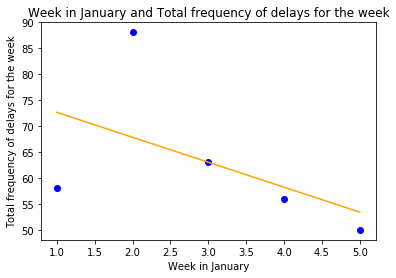

Correlation Coefficent Matrix:


,Frequency of Delays,Week in January
Frequency of Delays,1.000000,-0.515207
Week in January,-0.515207,1.000000


In [285]:
display_relevant_data("Monday")

## Tueday

Week Progression of Tuesday:


,Frequency of Delays
Week,
1,75
2,66
3,70
4,79
5,81


Scatter plot representation of Tuesdays:


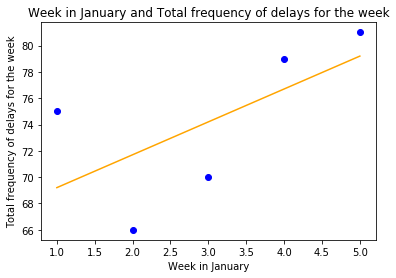

Correlation Coefficent Matrix:


,Frequency of Delays,Week in January
Frequency of Delays,1.000000,0.635411
Week in January,0.635411,1.000000


In [286]:
display_relevant_data("Tuesday")

## Wednesday

Week Progression of Wednesday:


,Frequency of Delays
Week,
1,67
2,58
3,81
4,77
5,62


Scatter plot representation of Wednesdays:


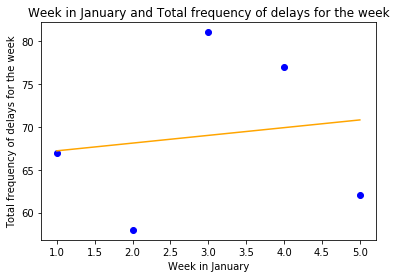

Correlation Coefficent Matrix:


,Frequency of Delays,Week in January
Frequency of Delays,1.000000,0.145617
Week in January,0.145617,1.000000


In [287]:
display_relevant_data("Wednesday")

## Thursday

Week Progression of Thursday:


,Frequency of Delays
Week,
1,63
2,74
3,62
4,60


Scatter plot representation of Thursdays:


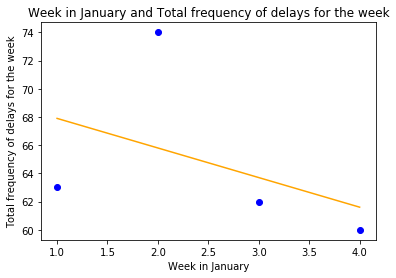

Correlation Coefficent Matrix:


,Frequency of Delays,Week in January
Frequency of Delays,1.000000,-0.430911
Week in January,-0.430911,1.000000


In [288]:
display_relevant_data("Thursday")

## Friday

Week Progression of Friday:


,Frequency of Delays
Week,
1,78
2,87
3,74
4,49


Scatter plot representation of Fridays:


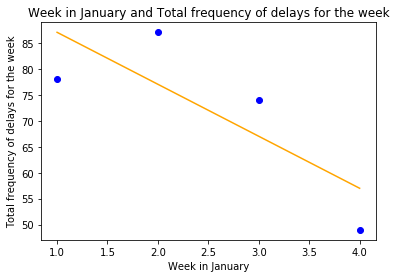

Correlation Coefficent Matrix:


,Frequency of Delays,Week in January
Frequency of Delays,1.000000,-0.793551
Week in January,-0.793551,1.000000


In [289]:
display_relevant_data("Friday")

## Saturday

Week Progression of Saturday:


,Frequency of Delays
Week,
1,47
2,33
3,51
4,45


Scatter plot representation of Saturdays:


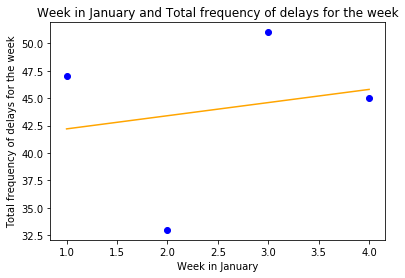

Correlation Coefficent Matrix:


,Frequency of Delays,Week in January
Frequency of Delays,1.0,0.2
Week in January,0.2,1.0


In [290]:
display_relevant_data("Saturday")

## Sunday

Week Progression of Sunday:


,Frequency of Delays
Week,
1,33
2,34
3,30
4,22


Scatter plot representation of Sundays:


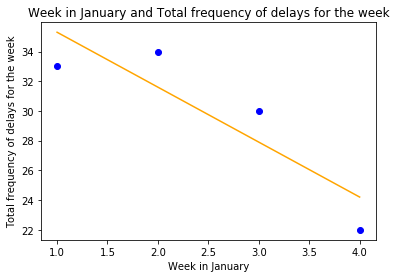

Correlation Coefficent Matrix:


,Frequency of Delays,Week in January
Frequency of Delays,1.000000,-0.878218
Week in January,-0.878218,1.000000


In [291]:
display_relevant_data("Sunday")

# Question 9: What was the worst day in January in terms of total delay time? What reason would you attribute to this phenomenon? Answer the question considering the best day in terms of total delay time.

The top dates that have the worst delays are the following:


,Min Delay
Date,
2018-01-08,356
2018-01-13,341
2018-01-16,289
2018-01-30,249
2018-01-01,238
2018-01-19,236
2018-01-12,223
2018-01-27,211
2018-01-04,210


A visual representation:


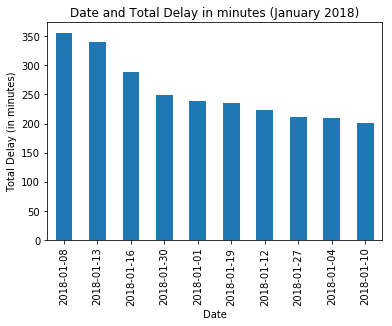

In [292]:
# What we want to do is group all of the data by its day
df_q9_base = df_ttc_original[:].groupby("Date")
# and considering that the question asks in terms of total
# delay time, we will be using the sum function
df_q9_base = df_q9_base.sum()
# and we would like to sort the data from greatest to
# least
df_q9 = df_q9_base[:].sort_values(by="Min Delay", ascending=False)

# now, we show the data that we're working with
print("The top dates that have the worst delays are the following:")
# we want to only display the delays in minutes of a specified
# date, but splicing it down to one column shows a series, which
# is somewhat messy so it's typecasted into a DataFrame
df_q9 = pd.DataFrame(df_q9["Min Delay"].head(10))
display(df_q9)

print("A visual representation:")
df_q9["Min Delay"].plot.bar()
plt.ylabel("Total Delay (in minutes)")
plt.xlabel("Date")
plt.title("Date and Total Delay in minutes (January 2018)")
plt.show()

What I would like to do is to see if there is a correlation between the weather and the delay, so I have prepared another csv file relating to weather to complement our data above

In [293]:
df_weather = pd.read_csv('toronto_weather_january.csv', index_col=0, header=0)
df_q9_base.loc[:, "Temperature"] = df_weather["Temperature"]

Let's focus on the weather days prior to the day with the highest delay

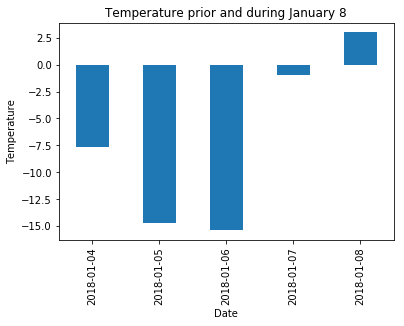

In [294]:
days = ["2018-01-04", "2018-01-05", "2018-01-06", "2018-01-07", "2018-01-08"]
df_highest = df_q9_base.loc[days]

df_highest["Temperature"].plot.bar()
plt.xlabel("Date")
plt.ylabel("Temperature")
plt.title("Temperature prior and during January 8")
plt.show()

Perhaps a lot of slush or a lot of ice that may have caused unsafe conditions. We can also try to find the top causes on January 8

Top 5 instances of the delays:


,Time,Day,Station,Code,Min Delay,Min Gap,Bound,Line,Vehicle
Date,,,,,,,,,
2018-01-08,05:45,Monday,BLOOR DANFORTH SUBWAY,MUFM,131,134,E,BD,5212
2018-01-08,15:28,Monday,WARDEN STATION,PUSSW,82,87,E,BD,5006
2018-01-08,05:36,Monday,WILSON STATION,EUTL,17,0,S,YU,5411
2018-01-08,22:11,Monday,CHESTER STATION,MUDD,12,16,E,BD,5085
2018-01-08,13:54,Monday,COXWELL STATION,TUNOA,8,11,W,BD,5276


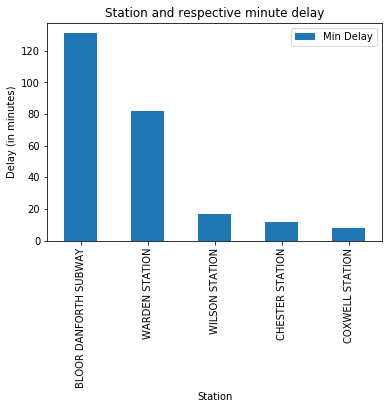

In [295]:
df_jn8 = df_ttc_original[:]
# we specifically want data from january 8
df_jn8 = df_jn8.loc['2018-01-08']
# now we want to order our data by the top delays
# that attributed to January 8 being at the top date that 
# has delays
df_jn8 = df_jn8.sort_values(by="Min Delay", ascending=False)
df_jn8 = df_jn8.head()
print("Top 5 instances of the delays:")
display(df_jn8)

# making of a bar graph
df_jn8.plot(x='Station', y='Min Delay', kind='bar')
plt.xlabel("Station")
plt.ylabel("Delay (in minutes)")
plt.title("Station and respective minute delay")
plt.show()

We find that the two stations that attribute the most is Bloor Danforth and Warden Station.

## The best day

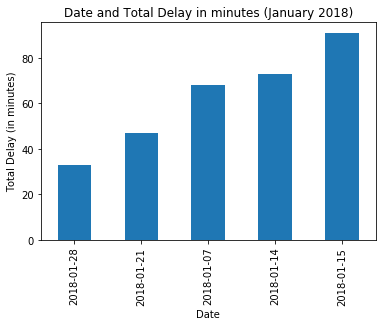

In [296]:
# first we want to get the data of our base dataframe
# and order it in ascending order
df_q9 = df_q9_base[:].sort_values(by="Min Delay")
# of which, we just want the top 5 days to display visually
df_q9 = df_q9.head()

#df_weather
df_q9["Min Delay"].plot.bar()
plt.ylabel("Total Delay (in minutes)")
plt.xlabel("Date")
plt.title("Date and Total Delay in minutes (January 2018)")
plt.show()

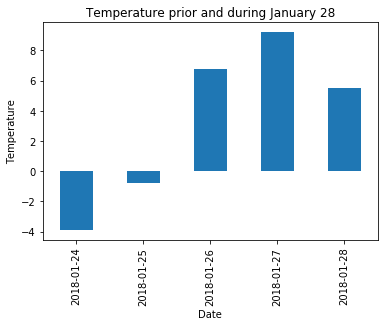

In [297]:
# and then we want the weather prior to and during January 28
days = ["2018-01-24", "2018-01-25", "2018-01-26", "2018-01-27", "2018-01-28"]
df_highest = df_q9_base.loc[days]

df_highest["Temperature"].plot.bar()
plt.xlabel("Date")
plt.ylabel("Temperature")
plt.title("Temperature prior and during January 28")
plt.show()

# Question 10: What are the top 10 vehicles associated with longer delays? That is, is there any link between the delays and vehicles? What reason could you attribute to this longer delay time?

In [298]:
# As discussed in initialization, we need to remove/impute some data

# What's really unique is that if a vehicle is strictly on the SRT line, then it's in the 3000 series
# to which we will just use the average of SRTs

# if the vehicle is strictly on the bloor danforth line, then it's in the 5000 series

# The younge union line is really difficult to say

# In this case, we can use SQL or strip-edit-add back
# since we don't have a proper database, we'll just
# strip-edit-add back

In [299]:
# get the original data
df_q10 = df_ttc_original[:]


df_srt = df_q10[:]
# get the srt specific data
df_srt = df_srt[df_srt["Line"]=="SRT"]
# now we can drop the srt specific data in df_q10, as we will be adding it later
df_q10 = df_q10[df_q10["Line"] != "SRT"]

# we use describe (temporary use) to find the average SRT vehicle
# we also need this to get the data that doesn't have an SRT vehicle number
df_temp = df_srt[df_srt["Vehicle"] != 0]
df_temp.describe()
# Average is 3015.

# Now we want to get the vehicles that only has a SRT vehicle number of 0
# and replace their vehicle number if 3015
df_srt["Vehicle"] = df_srt["Vehicle"].map({0:3015})
# after the code above, all vehicles that do have a SRT vehicle number that
# is not 0 is listed as null. in this case, we remove those vehicles
df_srt = df_srt.dropna(axis=0, subset=['Vehicle'])
# we append all srt data
df_srt = df_srt.append(df_temp)


# we can do the same thing for the blood danforth line
df_bd = df_q10[:]
df_bd = df_bd[df_bd["Line"] == "BD"]
# we can now drop the blood danforth line rows, we will be adding our data later
df_q10 = df_q10[df_q10["Line"] != "BD"]

# by temporary use, we will get the vehicles to find the average bloor danforth
# vehicle
df_temp = df_bd[df_bd["Vehicle"] != 0]
df_temp.describe()
# average is 5185


# Now we want to get the vehicles that only has a vehicle number of 0
# and replace it with 5185
df_bd["Vehicle"] = df_bd["Vehicle"].map({0:5185})
# after the code above, all vehicles that did have a vehicle number is
# listed as null. We remove those vehicles to only get rows whose
# vehicle number is 0
df_bd = df_bd.dropna(axis=0, subset=["Vehicle"])
# we append all bloor danforth data
df_bd = df_bd.append(df_temp)

# now we can add back our data to the original q10 dataframe
df_q10 = df_q10.append(df_srt)
df_q10 = df_q10.append(df_bd)

# we now just want to remove all vehicles whose vehicle number is 0
# as it is difficult to tell where they should be placed at
df_q10 = df_q10[df_q10["Vehicle"] != 0]

Now we can tackle the question: What are the top 10 vehicles associated with longer delays? That is, is there any link between the delays and vehicles?

There's probably hundreds of different vehicle numbers to pick. Considering how I have imputated the data above, it may be really skewed to two specific vehicle numbers if we were to use the sum function, so in this case, it may be best to view performance of delays as an average through the vehicle number

In [300]:
# in this case, we want to group the data by the vehicle number
df_q10 = df_q10.groupby("Vehicle")
# and as described above, I will be using the mean function instead
# of the sum function
df_q10 = df_q10.mean()

Now we want to determine the vehicles with the highest amount of delay

In [301]:
df_q10 = df_q10.sort_values(by="Min Delay", ascending=False)
print("The top 10 vehicles that have the highest delay times are the following:")
df_q10_top10 = pd.DataFrame(df_q10["Min Delay"].head(10))
df_q10_top10

The top 10 vehicles that have the highest delay times are the following:


,Min Delay
Vehicle,
3013.0,77.500000
5225.0,62.000000
5212.0,46.333333
3001.0,39.500000
5412.0,39.000000
5461.0,33.875000
5006.0,27.333333
5291.0,23.000000
5127.0,22.000000


Visually, we can see the comparison


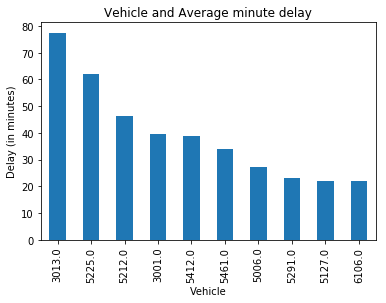

In [302]:
print("Visually, we can see the comparison")
# thanks to Question 2, we can see the comparison
# making of a bar graph

df_q10_top10["Min Delay"].plot.bar()
plt.xlabel("Vehicle")
plt.ylabel("Delay (in minutes)")
plt.title("Vehicle and Average minute delay")
plt.show()

Answering the second question: Is there any link between delays and vehicles?

There's going to be two approaches to this, the first being SRT only and the second being everything but SRT. However, let's start off with all data

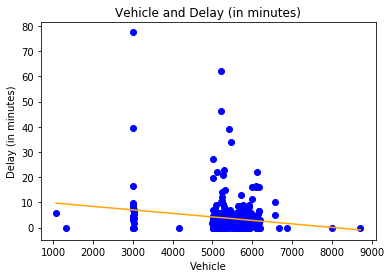

,Min Delay,Min Gap,Vehicle Number
Min Delay,1.000000,0.984256,-0.148336
Min Gap,0.984256,1.000000,-0.185282
Vehicle Number,-0.148336,-0.185282,1.000000


In [303]:
# Many thanks to question 2, we can do a scatter plot easily
scatter_plot_me(df_q10, "Min Delay", "Vehicle", "Delay (in minutes)")
# we want to add another column for vehicle numbers, specifically for
# the correlation coefficient
df_q10.loc[:, "Vehicle Number"] = df_q10.index.values
df_q10.corr("pearson")

We see that there is very little correlation. We also see that in our scatter plot, there's two vertical concentrations. To my knowledge, SRT only consists of the 3000 series, so we will be filtering

## SRT Only

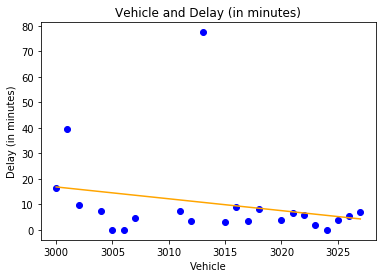

,Min Delay,Min Gap,Vehicle Number
Min Delay,1.000000,0.993237,-0.237778
Min Gap,0.993237,1.000000,-0.224600
Vehicle Number,-0.237778,-0.224600,1.000000


Consider removing the outlier


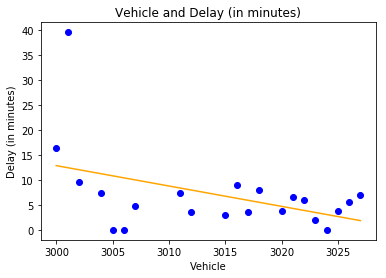

,Min Delay,Min Gap,Vehicle Number
Min Delay,1.000000,0.980724,-0.436981
Min Gap,0.980724,1.000000,-0.370227
Vehicle Number,-0.436981,-0.370227,1.000000


In [304]:
# copy all the data from the modified dataframe
df_srt_only = df_q10[:]
# then we want to loc into only those vehicles in the
# 3000 series
t_range = range(3000, 4001)
df_srt_only = df_srt_only.loc[t_range]
df_srt_only = df_srt_only.dropna(axis=0, subset=["Min Delay"])
df_srt_only

# We can draw a scatter plot, thanks to question 2
# Many thanks to question 2, we can do a scatter plot easily
scatter_plot_me(df_srt_only, "Min Delay", "Vehicle", "Delay (in minutes)")
display(df_srt_only.corr("pearson"))
print("Consider removing the outlier")
df_srt_only = df_srt_only[df_srt_only["Min Delay"] < 70]
scatter_plot_me(df_srt_only, "Min Delay", "Vehicle", "Delay (in minutes)")
df_srt_only.corr("pearson")

## Everything but SRT

Due to scaling issues (and as seen with what we did with all data), finding a line of best fit from 1000 to 9000 is rather difficult. In this case, we will be focusing on the second concentrated piece that we have seen in all data (which consists of vehicle numbers between 5000 to 7000) as it does represent a great majority of "other"

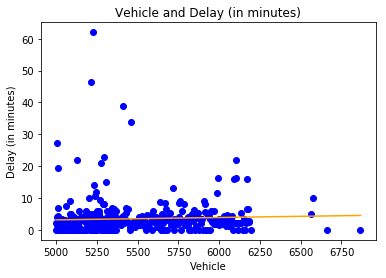

,Min Delay,Min Gap,Vehicle Number
Min Delay,1.000000,0.981517,0.046144
Min Gap,0.981517,1.000000,0.060814
Vehicle Number,0.046144,0.060814,1.000000


In [305]:
# copy all the data from the modified dataframe
df_no_srt = df_q10[:]
# then we want to loc into only those vehicles in the
# 5000 to 6000 series
t_range = range(5000, 7001)
df_no_srt = df_no_srt.loc[t_range]
df_no_srt = df_no_srt.dropna(axis=0, subset=["Min Delay"])

# We can draw a scatter plot, thanks to question 2
# Many thanks to question 2, we can do a scatter plot easily
scatter_plot_me(df_no_srt, "Min Delay", "Vehicle", "Delay (in minutes)")
df_no_srt.corr("pearson")